In [3]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as Axes3d
from PIL import Image
from torch import nn, optim, reshape
import random

In [4]:
transform = transforms.Compose([transforms.ToTensor()])

In [5]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform= transform)
subset_indices = torch.randperm(len(trainset))[:1000]
mnist_subset = torch.utils.data.Subset(trainset, subset_indices)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 144131899.65it/s]

Extracting ..\input\MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 92682244.70it/s]


Extracting ..\input\MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36277992.60it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ..\input\MNIST/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15705299.89it/s]

Extracting ..\input\MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ..\input\MNIST/MNIST/raw



In [6]:
len(mnist_subset)

1000

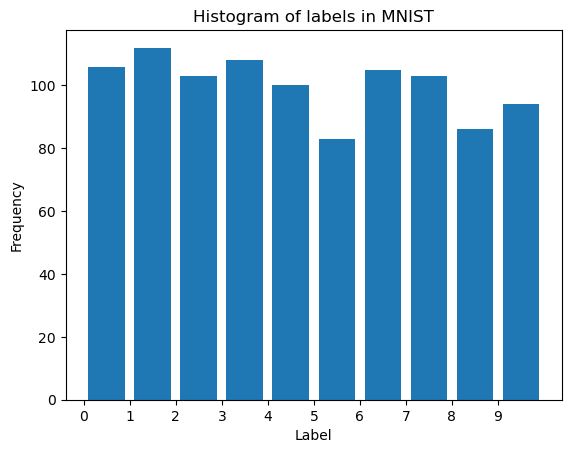

In [8]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# plot the histogram of the labels
plt.hist(labels, bins=10, range=(0, 10), align='mid', rwidth=0.8)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of labels in MNIST')
plt.xticks(range(10))
plt.show()

In [9]:

dataloader = torch.utils.data.DataLoader(mnist_subset, batch_size=25,shuffle=True)

In [10]:
mnist_subset[0][0][0][12][12].item()

0.0

In [11]:
all_data = torch.empty((len(dataloader), 25, 1, 28, 28))
for i, b in enumerate(dataloader):
    all_data[i] = b[0]

In [12]:

all_data.shape

torch.Size([40, 25, 1, 28, 28])

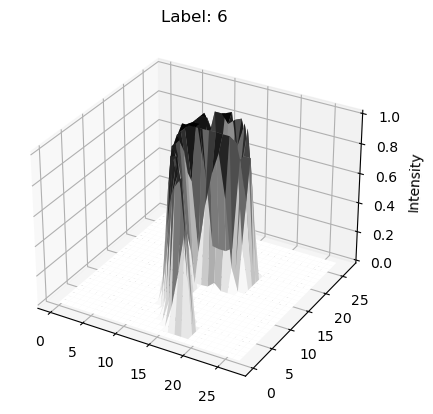

In [17]:
random_idx = torch.randint(len(trainset), size=(1,)).item()
image, label = trainset[random_idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

image_np = image.squeeze().numpy()
image_np_3d = np.zeros((28, 28, 3))
image_np_3d[:, :, 0] = image_np

# Extract the x, y, and z coordinates
x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)
z = image_np_3d[:, :, 0]


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='Greys', linewidth=0)

# Set the z axis limits and labels
ax.set_zlim(0, 1)
ax.set_zlabel('Intensity')

# Show the plot
plt.title(f'Label: {label}')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [23]:
df = pd.read_csv('energydata_complete.csv')

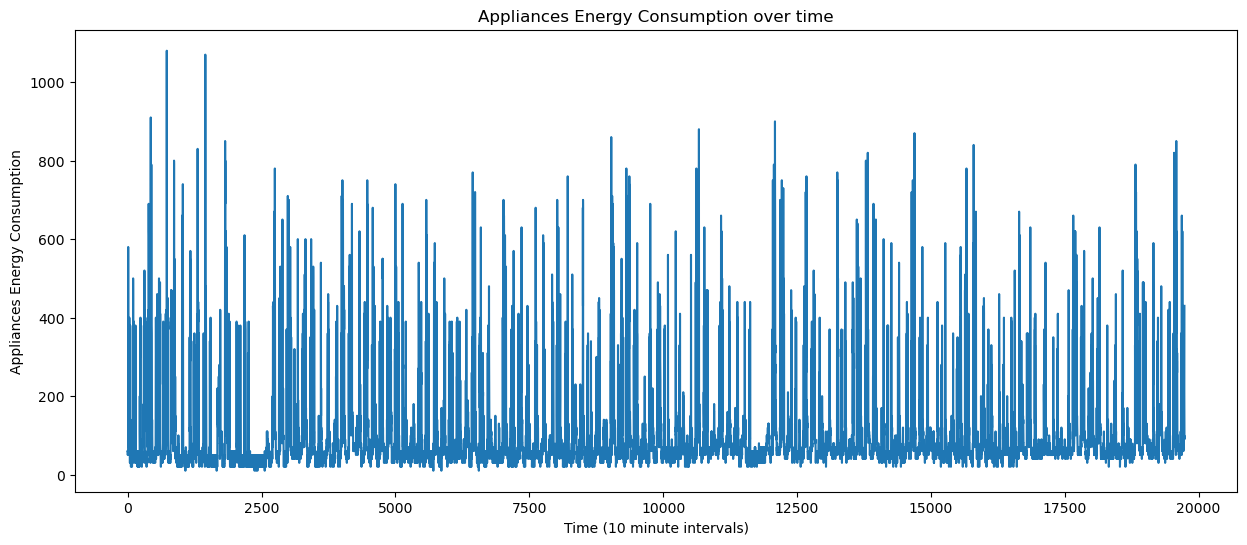

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df['Appliances'])
plt.xlabel("Time (10 minute intervals)")
plt.ylabel("Appliances Energy Consumption")
plt.title("Appliances Energy Consumption over time")
plt.show()

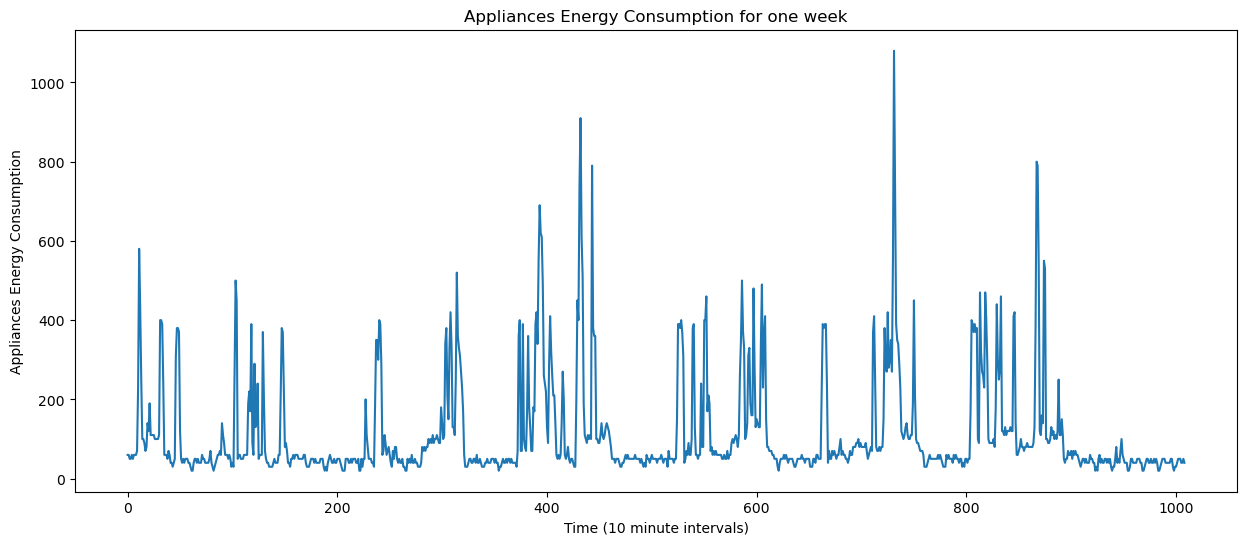

In [25]:
df_week = df.loc[:1008,:] 
plt.figure(figsize=(15,6))
plt.plot(df_week['Appliances'])
plt.xlabel("Time (10 minute intervals)")
plt.ylabel("Appliances Energy Consumption")
plt.title("Appliances Energy Consumption for one week")
plt.show()


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:

df = pd.read_csv("energydata_complete.csv")

In [55]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

In [56]:
agg = df.groupby(['hour', 'day_of_week'], as_index=False).mean()


In [57]:
pivot = agg.pivot(index='hour', columns='day_of_week', values='Appliances')


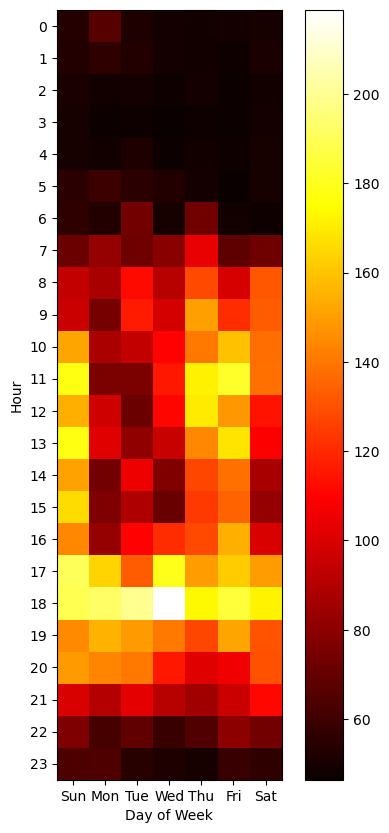

In [58]:
plt.figure(figsize=(6,10))
plt.imshow(pivot, cmap='hot')
plt.yticks(range(0,24,1))
xtick_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']  
plt.xticks(range(0,7,1),xtick_labels)
plt.colorbar()
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.show()

In [60]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)


100%|██████████| 9912422/9912422 [00:00<00:00, 170867045.50it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 225999428.78it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 41068726.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 40533039.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [61]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)


In [62]:
data = pd.read_csv("energydata_complete.csv")



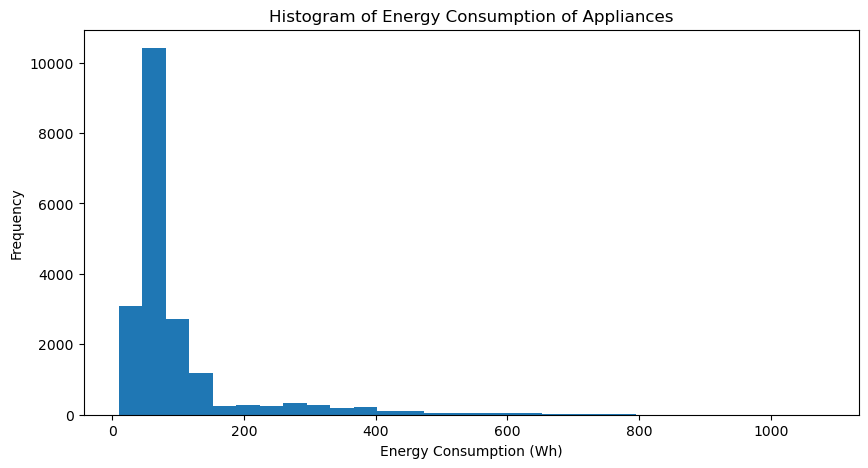

In [64]:
plt.figure(figsize=(10,5))
plt.hist(data['Appliances'], bins=30)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

In [68]:
df["NSM"] = df["date"].dt.hour * 3600 + df["date"].dt.minute * 60 + df["date"].dt.second


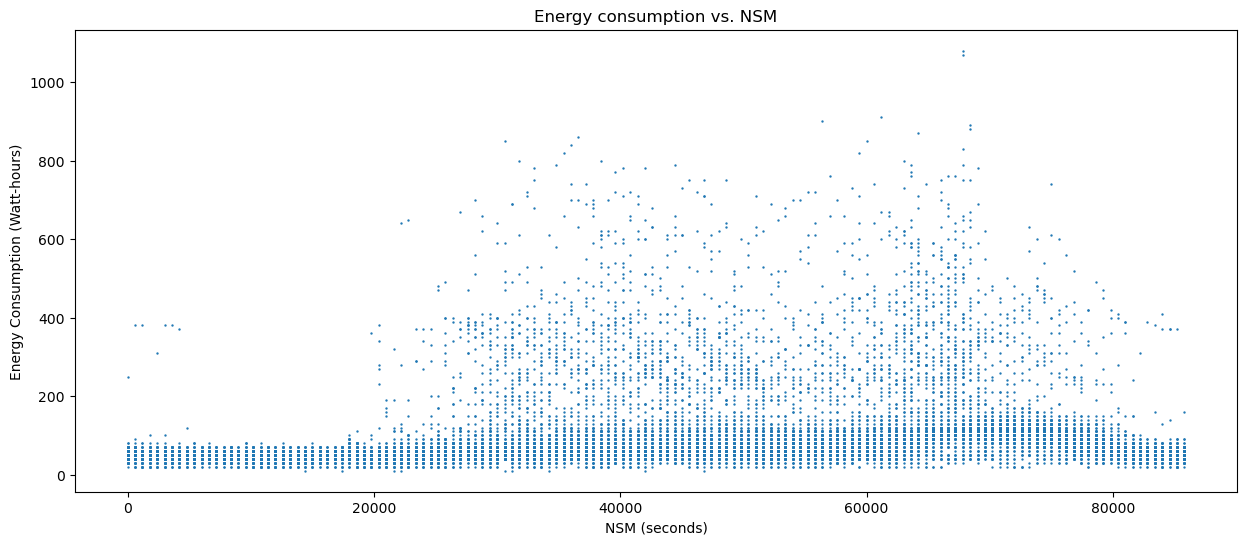

In [69]:
plt.figure(figsize=(15,6))
plt.scatter(df["NSM"], df["Appliances"], s=0.5)
plt.title("Energy consumption vs. NSM")
plt.xlabel("NSM (seconds)")
plt.ylabel("Energy Consumption (Watt-hours)")
plt.show()

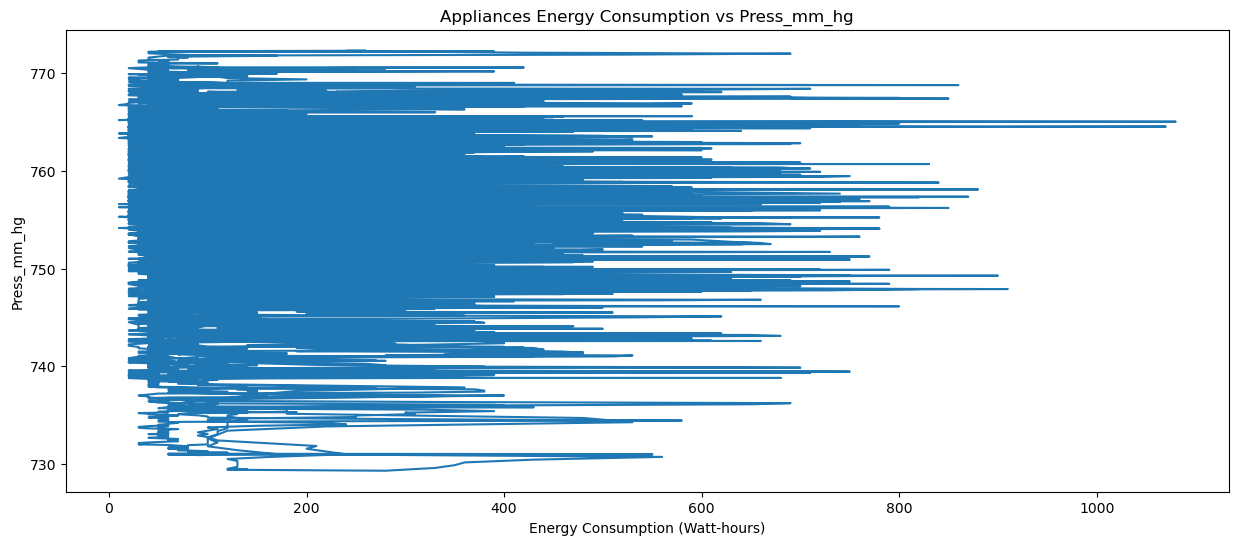

In [70]:
plt.figure(figsize=(15,6))
plt.plot(df['Appliances'],df['Press_mm_hg'])
plt.xlabel("Energy Consumption (Watt-hours)")
plt.ylabel("Press_mm_hg")
plt.title("Appliances Energy Consumption vs Press_mm_hg")
plt.show()

In [71]:
df = pd.read_table('airfoil_self_noise.dat', delim_whitespace=True)

In [72]:
df.head()
print(df)

       800     0  0.3048  71.3  0.00266337  126.201
0     1000   0.0  0.3048  71.3    0.002663  125.201
1     1250   0.0  0.3048  71.3    0.002663  125.951
2     1600   0.0  0.3048  71.3    0.002663  127.591
3     2000   0.0  0.3048  71.3    0.002663  127.461
4     2500   0.0  0.3048  71.3    0.002663  125.571
...    ...   ...     ...   ...         ...      ...
1497  2500  15.6  0.1016  39.6    0.052849  110.264
1498  3150  15.6  0.1016  39.6    0.052849  109.254
1499  4000  15.6  0.1016  39.6    0.052849  106.604
1500  5000  15.6  0.1016  39.6    0.052849  106.224
1501  6300  15.6  0.1016  39.6    0.052849  104.204

[1502 rows x 6 columns]


In [73]:

df.describe()

,800,0,0.3048,71.3,0.00266337,126.201
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [74]:
mean = df.mean()
print(mean)

800           2887.769640
0                6.786818
0.3048           0.136436
71.3            50.847137
0.00266337       0.011146
126.201        124.835034
dtype: float64


In [75]:
var = df.var()
print(var)

800           9.942437e+06
0             3.501691e+01
0.3048        8.736825e-03
71.3          2.423947e+02
0.00266337    1.729960e-04
126.201       4.762193e+01
dtype: float64


In [76]:
median = df.median()
print(median)

800           1600.000000
0                5.400000
0.3048           0.101600
71.3            39.600000
0.00266337       0.004957
126.201        125.719000
dtype: float64


In [77]:
kurt = df.kurtosis()
print(kurt)

800           5.704083
0            -0.413399
0.3048       -1.035595
71.3         -1.562758
0.00266337    2.215282
126.201      -0.316058
dtype: float64


In [78]:
skew = df.skew()
print(skew)

800           2.136180
0             0.688553
0.3048        0.458497
71.3          0.237297
0.00266337    1.701196
126.201      -0.418439
dtype: float64


In [79]:
rng = df.max() - df.min()
print(rng)

800           19800.000000
0                22.200000
0.3048            0.279400
71.3             39.600000
0.00266337        0.058011
126.201          37.607000
dtype: float64
